# making of fuction for PCA

In [83]:
def pca(data ,n):
  means = data.mean(axis=0)
  sigma = np.std(data,axis=0,ddof=1)

  stddata = (data-means)/sigma

  covmatx = np.cov(stddata, rowvar = False)

  eigenvalues, eigenvectors = np.linalg.eig(covmatx)

  order = np.argsort(eigenvalues)[::-1]

  sortvect = eigenvectors[:, order]

  if n != 0:
    vectorsubset = sortvect[:, :n]

  transformed = np.matmul(stddata,vectorsubset)
  return transformed

# M2


def pcam2(X, n):
    means = X.mean(axis=0)
    center = X - means

    covmatx = np.cov(center.T)

    eigenvalues, eigenvectors = np.linalg.eig(covmatx)

    order = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[order]
    sortvect = eigenvectors[:, order]

    if n != 0:
        vectorsubset = sortvect[:, :n]

    transformed = np.dot(center, vectorsubset)
    transformed *= -1
    
    return transformed

In [84]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 1. MAKING DATA SET

In [85]:
dfc = pd.DataFrame(np.random.randint(0, 10, size=(1000, 5)), columns=['Col1', 'Col2', 'Col3', 'Col4', 'Col5'])
dfc
# dfc.describe()

,Col1,Col2,Col3,Col4,Col5
0,3,5,9,3,6
1,1,0,3,9,8
2,3,9,4,2,4
3,4,0,1,3,6
4,1,4,8,6,3
...,...,...,...,...,...
995,8,8,4,8,1
996,1,7,2,7,3
997,6,7,5,2,2
998,5,6,3,5,0


# 1. TAKING DATA SET

In [86]:
dfold = pd.read_csv('/content/2011_rankings.csv')
dfold.head()

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited
0,1,1,Harvard University,96.1,1,99.7,1,72.4,49,34.5,105,98.7,2,98.8,8,United States,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False
1,2,2,California Institute of Technology,96.0,2,97.7,4,54.6,93,83.7,24,98.0,4,99.9,1,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False
2,3,3,Massachusetts Institute of Technology,95.6,3,97.8,3,82.3,36,87.5,21,91.4,11,99.9,2,United States,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False
3,4,4,Stanford University,94.3,4,98.3,2,29.5,156,64.3,33,98.1,3,99.2,6,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False
4,5,5,Princeton University,94.2,5,90.9,6,70.3,53,-,164,95.4,5,99.9,3,United States,Princeton University,"Languages, Literature & Linguistics,Biological...",False,False


sorting and making data in a way that it can be used

In [87]:
df = dfold[['scores_overall_rank','scores_citations_rank','scores_research_rank','scores_industry_income_rank','scores_international_outlook_rank']]

df['scores_overall_rank'] = df['scores_overall_rank'].replace(' ',0)
df['scores_overall_rank'] = df['scores_overall_rank'].replace('*',0)
scale = MinMaxScaler()
scale.fit(df[['scores_overall_rank']])
df['scores_overall_rank'] = scale.transform(df[['scores_overall_rank']])

df['scores_citations_rank'] = df['scores_citations_rank'].replace(' ',0)
df['scores_citations_rank'] = df['scores_citations_rank'].replace('*',0)
scale = MinMaxScaler()
scale.fit(df[['scores_citations_rank']])
df['scores_citations_rank'] = scale.transform(df[['scores_citations_rank']])

df['scores_research_rank'] = df['scores_research_rank'].replace(' ',0)
df['scores_research_rank'] = df['scores_research_rank'].replace('*',0)
scale = MinMaxScaler()
scale.fit(df[['scores_research_rank']])
df['scores_research_rank'] = scale.transform(df[['scores_research_rank']])

df['scores_industry_income_rank'] = df['scores_industry_income_rank'].replace(' ',0)
df['scores_industry_income_rank'] = df['scores_industry_income_rank'].replace('*',0)
scale = MinMaxScaler()
scale.fit(df[['scores_industry_income_rank']])
df['scores_industry_income_rank'] = scale.transform(df[['scores_industry_income_rank']])

df['scores_international_outlook_rank'] = df['scores_international_outlook_rank'].replace(' ',0)
df['scores_international_outlook_rank'] = df['scores_international_outlook_rank'].replace('*',0)
scale = MinMaxScaler()
scale.fit(df[['scores_international_outlook_rank']])
df['scores_international_outlook_rank'] = scale.transform(df[['scores_international_outlook_rank']])
df

<ipython-input-87-19974d9a7f1c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-19974d9a7f1c>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-19974d9a7f1c>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-87-19974d9

,scores_overall_rank,scores_citations_rank,scores_research_rank,scores_industry_income_rank,scores_international_outlook_rank
0,0.000000,0.035176,0.005025,0.522613,0.241206
1,0.005025,0.000000,0.015075,0.115578,0.462312
2,0.010050,0.005025,0.050251,0.100503,0.175879
3,0.015075,0.025126,0.010050,0.160804,0.778894
4,0.020101,0.010050,0.020101,0.819095,0.261307
...,...,...,...,...,...
195,0.979899,0.412060,0.984925,0.693467,0.954774
196,0.984925,0.984925,0.683417,0.899497,0.502513
197,0.989950,0.949749,0.844221,0.150754,0.773869
198,0.994975,0.718593,0.743719,0.467337,0.497487


# PLOT of our DATA SET

In [88]:
print('Bibliography for 5D plot')
'''Ostwal, Prasad. 2019. “Multi-Dimension Plots in Python — From 3D to 6D. - Prasad Ostwal.” Medium. May 28, 2019. https://medium.com/@prasadostwal/multi-dimension-plots-in-python-from-2d-to-6d-9a2bf7b8cc74.'''

Bibliography for 5D plot


'Ostwal, Prasad. 2019. “Multi-Dimension Plots in Python — From 3D to 6D. - Prasad Ostwal.” Medium. May 28, 2019. https://medium.com/@prasadostwal/multi-dimension-plots-in-python-from-2d-to-6d-9a2bf7b8cc74.'

In [89]:
import plotly.graph_objs as go
from plotly.offline import iplot

markersize = df['scores_industry_income_rank']*20
markercolor = df['scores_international_outlook_rank']

plots = go.Scatter3d(x=df['scores_overall_rank'], y=df['scores_citations_rank'], z=df['scores_research_rank'],
    mode='markers',
    marker=dict(size=markersize, color=markercolor, colorscale='Blues', opacity=0.8))

mylayout = go.Layout(scene=dict(xaxis=dict( title='scores_overall_rank'),
                                yaxis=dict( title='scores_citations_rank'),
                                zaxis=dict(title='scores_research_rank')))

fig = go.Figure(data=[plots], layout=mylayout)

iplot(fig)

# 2. SIZE of dataset

In [90]:
np.shape(df)
df.shape

(200, 5)

# 2. VALUE of number of clusters

In [91]:
# df.describe()
num_clusters = 3

# 2. K MEAN OPERATION

In [92]:
import time

initial = time.time()

km = KMeans(num_clusters)
predicted = km.fit_predict(df)

final = time.time()

predicted

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2], dtype=int32)

# 2. TIME REQUIRED

In [93]:
print(final - initial)

0.03803110122680664


# 3. Using Direct fuction Reducing the dimension of all the datapoints in the dataset

In [94]:
from sklearn.decomposition import PCA

print(df.shape)

pc = PCA(0.95) # as this (0.95) persentage decreses accurassy also decreases
reduceddf = pc.fit_transform(df)

print(reduceddf.shape)

(200, 5)
(200, 4)


# 3. Using made 1 fuction Reducing the dimension of all the datapoints in the dataset

In [95]:
print(df.shape)

df4d = pca(df,4)

print(df4d.shape)

(200, 5)
(200, 4)


# 3. Using made 2 fuction Reducing the dimension of all the datapoints in the dataset

In [96]:
print(df.shape)

dfm24d = pcam2(df,4)

print(dfm24d.shape)

(200, 5)
(200, 4)


# 4. SIZE of reduced dataset

In [97]:
print(df4d.shape)

(200, 4)


# 4. VALUE of number of clusters

In [98]:
# df.describe()
new_clusters = num_clusters

# 4. K MEAN OPERATION on reduced dataset


In [99]:
initial1 = time.time()

km = KMeans(new_clusters)
newpredicted = km.fit_predict(df4d)

final1 = time.time()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



# 4. TIME REQUIRED for reduced dataset

In [100]:
print(f'TIME REQUIRED for orignal dataset\n{final - initial}\n\nTIME REQUIRED for reduced dataset\n{final1 - initial1}')

TIME REQUIRED for orignal dataset
0.03803110122680664

TIME REQUIRED for reduced dataset
0.029003143310546875


# 5. 
Repeat the Step 4 for number of dimensions equal to 2 and 3 and visualize the clustering results using appropriate plots

# 5. For 3D

using m1 of pca

In [101]:
df3d = pca(df,3) # as this n_components decreses accurassy also decreases

# SHAPE

print(f'SHAPE for 3D \n{df3d.shape}\n')

# KMEAN

initial3d = time.time()

km = KMeans(new_clusters)
predicted3d = km.fit_predict(df3d)

final3d = time.time()

# TIME

print(f'TIME REQUIRED for 3D \n{final3d - initial3d}')

SHAPE for 3D 
(200, 3)

TIME REQUIRED for 3D 
0.025171756744384766


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [102]:
import plotly
import plotly.graph_objs as go

In [103]:
# PLOT

listx1 = df3d.values.tolist()

count=0
for i in predicted3d:
  listx1[count].append(i)
  count = count +1 

lis1=[]
lis2=[]
lis3=[]
j=0
i=0

for i in listx1:
  if i[3]==0:
    lis1.append(listx1[j])
  elif i[3]==1:
    lis2.append(listx1[j])
  elif i[3]==2:
    lis3.append(listx1[j])
  j=j+1

arr1 = np.array(lis1)
arr2 = np.array(lis2)
arr3 = np.array(lis3)

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=arr1[:, 0], y=arr1[:, 1], z=arr1[:, 2], marker=dict(size=5), mode='markers', name='cluster 1'))
fig.add_trace(go.Scatter3d(x=arr2[:, 0], y=arr2[:, 1], z=arr2[:, 2], marker=dict(size=5), mode='markers', name='cluster 2'))
fig.add_trace(go.Scatter3d(x=arr3[:, 0], y=arr3[:, 1], z=arr3[:, 2], marker=dict(size=5), mode='markers', name='cluster 3'))

# fig.update_layout(scene=dict(xaxis=dict(title='scores_overall_rank'),
#                                 yaxis=dict(title='scores_citations_rank'),
#                                 zaxis=dict(title='scores_research_rank')))

fig.show()


# Another way

# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(arr1[:, 0], arr1[:, 1], arr1[:, 2], c='red', label='cluster 1')
# ax.scatter(arr2[:, 0], arr2[:, 1], arr2[:, 2], c='green', label='cluster 2')
# ax.scatter(arr3[:, 0], arr3[:, 1], arr3[:, 2], c='blue', label='cluster 3')

# ax.set_xlabel('scores_overall_rank')
# ax.set_ylabel('scores_citations_rank')
# ax.set_zlabel('scores_research_rank')
# ax.legend()

# plt.show()

using m2 of pca

In [104]:
dfm23d = pcam2(df,3) # as this n_components decreses accurassy also decreases

# SHAPE

print(f'SHAPE for 3D \n{dfm23d.shape}\n')

# KMEAN

initial3d = time.time()

km = KMeans(new_clusters)
predicted3d = km.fit_predict(dfm23d)

final3d = time.time()

# TIME

print(f'TIME REQUIRED for 3D \n{final3d - initial3d}')

SHAPE for 3D 
(200, 3)

TIME REQUIRED for 3D 
0.021242141723632812


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [105]:
# PLOT

listx1 = dfm23d.tolist()

count=0
for i in predicted3d:
  listx1[count].append(i)
  count = count +1 

lis1=[]
lis2=[]
lis3=[]
j=0
i=0

for i in listx1:
  if i[3]==0:
    lis1.append(listx1[j])
  elif i[3]==1:
    lis2.append(listx1[j])
  elif i[3]==2:
    lis3.append(listx1[j])
  j=j+1

arr1 = np.array(lis1)
arr2 = np.array(lis2)
arr3 = np.array(lis3)

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=arr1[:, 0], y=arr1[:, 1], z=arr1[:, 2], marker=dict(size=5), mode='markers', name='cluster 1'))
fig.add_trace(go.Scatter3d(x=arr2[:, 0], y=arr2[:, 1], z=arr2[:, 2], marker=dict(size=5), mode='markers', name='cluster 2'))
fig.add_trace(go.Scatter3d(x=arr3[:, 0], y=arr3[:, 1], z=arr3[:, 2], marker=dict(size=5), mode='markers', name='cluster 3'))

# fig.update_layout(scene=dict(xaxis=dict(title='scores_overall_rank'),
#                                 yaxis=dict(title='scores_citations_rank'),
#                                 zaxis=dict(title='scores_research_rank')))

fig.show()


# Another way

# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(arr1[:, 0], arr1[:, 1], arr1[:, 2], c='red', label='cluster 1')
# ax.scatter(arr2[:, 0], arr2[:, 1], arr2[:, 2], c='green', label='cluster 2')
# ax.scatter(arr3[:, 0], arr3[:, 1], arr3[:, 2], c='blue', label='cluster 3')

# ax.set_xlabel('scores_overall_rank')
# ax.set_ylabel('scores_citations_rank')
# ax.set_zlabel('scores_research_rank')
# ax.legend()

# plt.show()

# 5. For 2D

using m1 of pca

In [106]:
# as this n_components decreses accurassy also decreases
df2d = pca(df,2)

# SHAPE

print(f'SHAPE for 2D \n{df2d.shape}\n')

# KMEAN

initial2d = time.time()

km = KMeans(new_clusters)
predicted2d = km.fit_predict(df2d)

final2d = time.time()

# TIME

print(f'TIME REQUIRED for 2D \n{final2d - initial2d}')

SHAPE for 2D 
(200, 2)

TIME REQUIRED for 2D 
0.033339500427246094


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



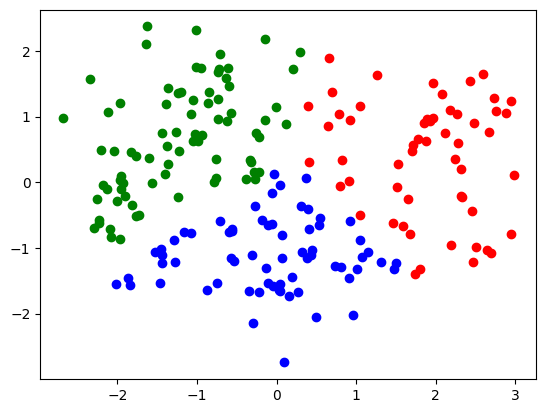

In [107]:
# PLOT

listx2 = df2d.values.tolist()

count=0
for i in predicted2d:
  listx2[count].append(i)
  count = count +1 

lis1=[]
lis2=[]
lis3=[]
j=0
i=0

for i in listx2:
  if i[2]==0:
    lis1.append(listx2[j])
  elif i[2]==1:
    lis2.append(listx2[j])
  elif i[2]==2:
    lis3.append(listx2[j])
  j=j+1

arr1 = np.array(lis1)
arr2 = np.array(lis2)
arr3 = np.array(lis3)

plt.scatter(arr1[:,0],arr1[:,1],color='blue')
plt.scatter(arr2[:,0],arr2[:,1],color='red')
plt.scatter(arr3[:,0],arr3[:,1],color='green')

using m2 of pca

In [108]:
 # as this n_components decreses accurassy also decreases
dfm22d = pcam2(df,2)

# SHAPE

print(f'SHAPE for 2D \n{dfm22d.shape}\n')

# KMEAN

initial2d = time.time()

km = KMeans(new_clusters)
predicted2d = km.fit_predict(dfm22d)

final2d = time.time()

# TIME

print(f'TIME REQUIRED for 2D \n{final2d - initial2d}')

SHAPE for 2D 
(200, 2)

TIME REQUIRED for 2D 
0.020876407623291016


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



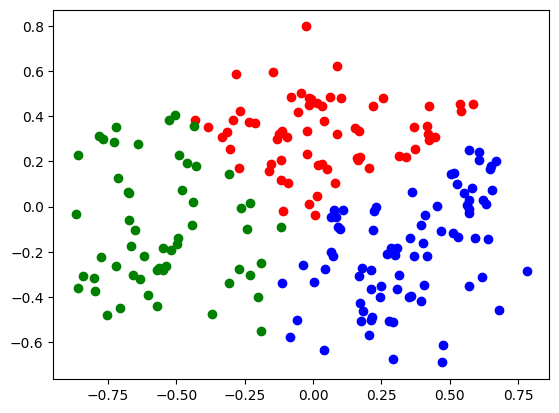

In [109]:
# PLOT

listx2 = dfm22d.tolist() 

count=0
for i in predicted2d:
  listx2[count].append(i)
  count = count +1 

lis1=[]
lis2=[]
lis3=[]
j=0
i=0

for i in listx2:
  if i[2]==0:
    lis1.append(listx2[j])
  elif i[2]==1:
    lis2.append(listx2[j])
  elif i[2]==2:
    lis3.append(listx2[j])
  j=j+1

arr1 = np.array(lis1)
arr2 = np.array(lis2)
arr3 = np.array(lis3)

plt.scatter(arr1[:,0],arr1[:,1],color='blue')
plt.scatter(arr2[:,0],arr2[:,1],color='red')
plt.scatter(arr3[:,0],arr3[:,1],color='green')

# TIME REQUERED BY ALL

In [110]:
print(f'TIME REQUIRED for orignal dataset\n{final - initial}\n\nTIME REQUIRED for reduced dataset\n{final1 - initial1}\n\nTIME REQUIRED for 3D\n{final3d - initial3d}\n\nTIME REQUIRED for 2D\n{final2d - initial2d}')

TIME REQUIRED for orignal dataset
0.03803110122680664

TIME REQUIRED for reduced dataset
0.029003143310546875

TIME REQUIRED for 3D
0.021242141723632812

TIME REQUIRED for 2D
0.020876407623291016
